- Reference
  - https://techblog.nhn-techorus.com/archives/8813

In [1]:
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
vgg16 = VGG16()

553467904/553467096 [==============================] - 33s 0us/step


In [3]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
weights = vgg16.get_layer('block1_conv1').get_weights()[0]
weights.shape

(3, 3, 3, 64)

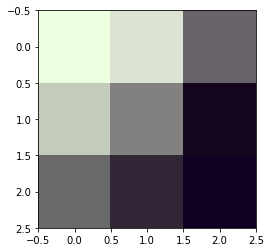

In [5]:
w = weights[:, :, ::-1, 0].copy()
m = w.min()
M = w.max()
w = (w-m)/(M-m)
plt.imshow(w)

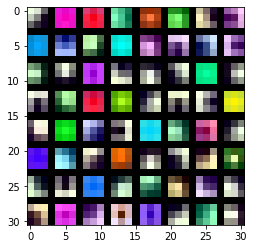

In [10]:
result = Image.new("RGB", (3*8+(8-1), 3*8+(8-1)))

for i in range(64):
    w= weights[:, :, ::-1, i].copy()
    M = w.max()
    m = w.min()
    w = (w-m)/(M-m)
    w *= 255
    img = Image.fromarray(w.astype("uint8"), mode="RGB")
    result.paste(img, (3*(i//8) + (i//8), 3*(i%8)+(i%8)))
 
plt.imshow(result)

In [12]:
weights = vgg16.get_layer('block1_conv2').get_weights()[0]
weights.shape

(3, 3, 64, 64)

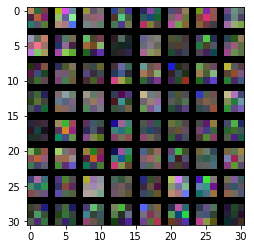

In [13]:
result = Image.new("RGB", (3*8+(8-1), 3*8+(8-1)))

for i in range(64):
    w= weights[:, :, ::-1, i].copy()
    M = w.max()
    m = w.min()
    w = (w-m)/(M-m)
    w *= 255
    img = Image.fromarray(w.astype("uint8"), mode="RGB")
    result.paste(img, (3*(i//8) + (i//8), 3*(i%8)+(i%8)))
 
plt.imshow(result)

In [14]:
weights = vgg16.get_layer('block2_conv1').get_weights()[0]
weights.shape

(3, 3, 64, 128)

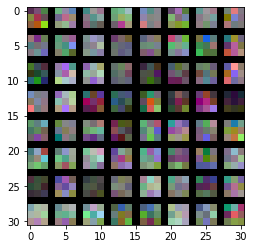

In [15]:
result = Image.new("RGB", (3*8+(8-1), 3*8+(8-1)))

for i in range(64):
    w= weights[:, :, ::-1, i].copy()
    M = w.max()
    m = w.min()
    w = (w-m)/(M-m)
    w *= 255
    img = Image.fromarray(w.astype("uint8"), mode="RGB")
    result.paste(img, (3*(i//8) + (i//8), 3*(i%8)+(i%8)))
 
plt.imshow(result)

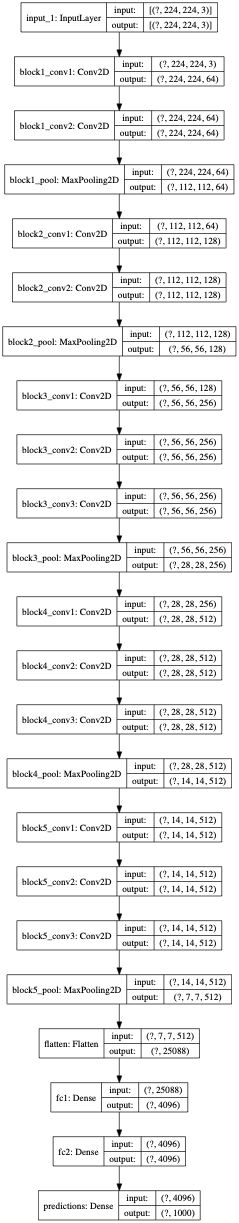

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(vgg16, show_shapes=True, dpi=48, expand_nested=True)